# Figure of firing maps statistics between open field, light and dark trials.

Most calculations of the scores was done in `light_dark_stats.ipynb` and saved in `/adata/projects/autopi_ca1/results/light_dark_stats.csv`

This includes mean rate, peak rate, info scores, map correlations for the 3 main conditions

In [1]:
%load_ext autoreload
%autoreload 2
%run setup_project.py


Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 44 testing sessions in the list
See myProject and sSesList objects


Load the firing rate maps, HD tuning curves, HD stats, HD stability, HD threhold

In [14]:
fn = "/adata/projects/autopi_ca1/results/myMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myMaps = pickle.load(handle)
    
fn = "/adata/projects/autopi_ca1/results/myDirMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myDirMaps = pickle.load(handle)
    
fn = "/adata/projects/autopi_ca1/results/myHdHist.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myHist = pickle.load(handle)

In [15]:
fn = "/adata/projects/autopi_ca1/results/myHdStats.csv" # , data frame with hd stats
hdStats = pd.read_csv(fn)
fn = "/adata/projects/autopi_ca1/results/myHdStability.csv" #, data frame with stability (r) for across different conditions (oo,ol,od,ld)
hdStab = pd.read_csv(fn)
fn = "/adata/projects/autopi_ca1/results/myHdThreshold.csv" #, threshold for the vector length
hdThre = pd.read_csv(fn)
fn = "/adata/projects/autopi_ca1/results/dirMapCorDf.csv" #, stability between north and south maps
dirMapStab = pd.read_csv(fn)


Load spike-time autocorrelations

In [16]:
fb=myProject.dataPath+"/results/"
autoStack = np.load(fb+"autoCorr25Stack.npy")
autoTimestamps = np.load(fb+"autoCorr25TimeStamp.npy")

Check data integrity

In [17]:
for k in myMaps:
    print(myMaps[k].shape)
for k in myHist:
    print(myHist[k].shape)
print(hdStats[hdStats.condition=="light"].shape)
print(hdStab[hdStab.condition=="oo"].shape)
print(dirMapStab[dirMapStab.condition=="light"].shape)
print(hdThre[hdThre.condition=="light"].shape)
print(autoStack.shape)

(1489, 33, 49)
(1489, 33, 49)
(1489, 33, 49)
(1489, 33, 49)
(1489, 33, 49)
(1489, 33, 49)
(1489, 33, 49)
(1489, 36)
(1489, 36)
(1489, 36)
(1489, 36)
(1489, 36)
(1489, 36)
(1489, 36)
(1489, 6)
(1489, 2)
(1489, 2)
(1489, 3)
(1489, 100)


## Filter the data to keep only pyramidal cells

We want to show the maps of pyramidal cells.

In [18]:
fn=myProject.dataPath+"/results/cell_classification.csv"
ct = pd.read_csv(fn)
ct

,id,session,subject,valid,cellType,meanRate,shank,layer
0,mn5824-20112020-0107_80,mn5824-20112020-0107,mn5824,False,NaN,9.201345,4,pyr
1,mn5824-20112020-0107_90,mn5824-20112020-0107,mn5824,False,NaN,8.236764,3,pyr
2,mn5824-20112020-0107_92,mn5824-20112020-0107,mn5824,True,pyr,7.885922,4,pyr
3,mn5824-20112020-0107_96,mn5824-20112020-0107,mn5824,False,NaN,4.153462,1,dn
4,mn5824-20112020-0107_98,mn5824-20112020-0107,mn5824,False,NaN,3.411940,4,pyr
...,...,...,...,...,...,...,...,...
1484,mn9686-01112021-0106_238,mn9686-01112021-0106,mn9686,False,NaN,4.669745,7,dn
1485,mn9686-01112021-0106_240,mn9686-01112021-0106,mn9686,False,NaN,9.647625,2,pyr
1486,mn9686-01112021-0106_241,mn9686-01112021-0106,mn9686,False,NaN,16.161014,2,pyr
1487,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686,True,pyr,5.270951,1,pyr


In [19]:
if ct.shape[0]!=myMaps["circ80"].shape[0]:
    print("problem with length of cell_classification.csv")

In [20]:
pyrIndices=ct.cellType=="pyr"
pyrId=ct.id[ct.cellType=="pyr"]
print("Pyramidal cells: {}".format(np.sum(ct.cellType=="pyr")))


Pyramidal cells: 472


In [21]:
for key in myMaps:
    myMaps[key]=myMaps[key][pyrIndices]
for key in myDirMaps:
    myDirMaps[key]=myDirMaps[key][pyrIndices]

for key in myHist:
    myHist[key]=myHist[key][pyrIndices]


In [22]:
hdStats = hdStats[hdStats.cellId.isin(pyrId)]
hdStats.shape

(3304, 6)

In [23]:
hdStab["cellId"] = np.concatenate([ct.id.to_numpy()]*4) # 4 because of 4 conditions
hdStab = hdStab[hdStab.cellId.isin(pyrId)]
dirMapStab["cellId"] = np.concatenate([ct.id.to_numpy()]*3) # 3 because of 3 conditions
dirMapStab = dirMapStab[dirMapStab.cellId.isin(pyrId)]


hdStab.shape[0]/4,dirMapStab.shape[0]/3

(472.0, 472.0)

In [24]:
hdThre = hdThre[hdThre.cellId.isin(pyrId)]
hdThre.shape

(3304, 3)

In [25]:
pyrId = pyrId.reset_index(drop=True)

## Example of cells

We need to show the maps and HD poloar plots of example cells. This will helps making clear what types of cells we have. It could be useful to generate hypotheses.

We can save all of it in a big pdf file.

In [26]:
for cluName, cluIndex in zip(pyrId,pyrId.index.to_numpy()):
    print(cluIndex,cluName)
    if cluIndex ==10:
        break
    
    

0 mn5824-20112020-0107_92
1 mn5824-20112020-0107_100
2 mn5824-20112020-0107_114
3 mn5824-20112020-0107_116
4 mn5824-20112020-0107_118
5 mn5824-20112020-0107_122
6 mn5824-20112020-0107_124
7 mn5824-22112020-0107_110
8 mn5824-22112020-0107_114
9 mn5824-22112020-0107_116
10 mn5824-22112020-0107_122


In [27]:
hdStats[hdStats.cellId==cluName]

,cellId,condition,prefDir,peakAngle,peakRate,vectorLength
15,mn5824-22112020-0107_122,circ80,-0.745168,-0.436332,8.150325,0.152824
1504,mn5824-22112020-0107_122,circ80_1,-0.909373,-0.436332,8.459622,0.185785
2993,mn5824-22112020-0107_122,circ80_2,-0.568385,-0.436332,7.692723,0.122981
4482,mn5824-22112020-0107_122,light,-1.708322,-2.007129,9.119364,0.464913
5971,mn5824-22112020-0107_122,light_arena,-0.671515,-0.436332,3.144184,0.268200
7460,mn5824-22112020-0107_122,dark,-1.986008,-2.007129,3.144691,0.460453
8949,mn5824-22112020-0107_122,dark_arena,2.688986,-3.054326,1.007993,0.304456


In [34]:
myDirMaps.keys()

dict_keys(['circ80_north', 'circ80_south', 'light_north', 'light_south', 'dark_north', 'dark_south'])

In [44]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

condNames={"circ80":"OF",
           "circ80_1":"OF1",
          "circ80_2": "OF2",
          "light": "Light",
          "dark": "Dark",
          "light_arena":"Light arena",
          "dark_arena": "Dark arena"}

col=3
row=4
sizePerCol=1.6
sizePerRow=2


figName=myProject.dataPath+"/results/mapHd.pdf"
print("saving in",figName)
with PdfPages(figName) as pdf:
  
    for cluName, cellIndex in zip(pyrId,pyrId.index.to_numpy()):
        print(cellIndex,cluName)
        #if cellIndex==10:
        #    break
        
        fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=False) # create the overall figure to put all the axes on
        cellStats = hdStats[hdStats.cellId==cluName]


        #firing rate maps
        gsMap = fig.add_gridspec(nrows=4, ncols=3,
                                  wspace=0,hspace=0)

        for i,cond in enumerate(["circ80","light","dark"]):
            ax = fig.add_subplot(gsMap[0,i])
            ax.imshow(myMaps[cond][cellIndex].T,origin="lower",cmap='jet')
            myText="{:.1f} Hz".format(np.nanmax(myMaps[cond][cellIndex]))
            ax.text(7,myMaps[cond][cellIndex].shape[1]-2,myText)
            ax.set_title(condNames[cond],y=1.06)
            ax.axis('off')
            if i == 0:
                ax.text(0,0,"{} {}".format(cluName,cellIndex))


        #polar plots
        gsPol = fig.add_gridspec(nrows=4, ncols=3,
                                  wspace=0.4,hspace=0.4)
        angles = np.linspace(-np.pi,np.pi,37)
        for i,cond in enumerate(["circ80","light_arena","dark_arena"]):
            ax = fig.add_subplot(gsPol[1,i], polar=True)
            ax.plot(angles[:-1], myHist[cond][cellIndex])
            ax.set_xticklabels([])
            myText = "vl:{:.2f}".format(cellStats[cellStats.condition==cond].vectorLength.item())
            max = np.max(myHist[cond][cellIndex])
            ax.text(np.pi/2+0.3,max+max*0.3,myText)
            #ax.grid(True)

        # north maps
        
        for i,cond in enumerate(["circ80_north","light_north","dark_north"]):
            ax = fig.add_subplot(gsMap[2,i])
            ax.imshow(myDirMaps[cond][cellIndex].T,origin="lower",cmap='jet')
            myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))
            ax.text(7,myDirMaps[cond][cellIndex].shape[1]-2,myText)
            #ax.set_title(condNames[cond],y=1.06)
            ax.axis('off')
            if i == 0:
                ax.text(0,0,"{} {}".format(cluName,cellIndex))

        
        # south maps
        for i,cond in enumerate(["circ80_south","light_south","dark_south"]):
            ax = fig.add_subplot(gsMap[3,i])
            ax.imshow(myDirMaps[cond][cellIndex].T,origin="lower",cmap='jet')
            myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))
            ax.text(7,myDirMaps[cond][cellIndex].shape[1]-2,myText)
            #ax.set_title(condNames[cond],y=1.06)
            ax.axis('off')
            if i == 0:
                ax.text(0,0,"{} {}".format(cluName,cellIndex))
            
            
            
            
            
            
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()


saving in /adata/projects/autopi_ca1/results/mapHd.pdf
0 mn5824-20112020-0107_92
1 mn5824-20112020-0107_100
2 mn5824-20112020-0107_114
3 mn5824-20112020-0107_116
4 mn5824-20112020-0107_118
5 mn5824-20112020-0107_122
6 mn5824-20112020-0107_124
7 mn5824-22112020-0107_110
8 mn5824-22112020-0107_114
9 mn5824-22112020-0107_116
10 mn5824-22112020-0107_122
11 mn5824-22112020-0107_124
12 mn5824-22112020-0107_126
13 mn5824-22112020-0107_130
14 mn5824-22112020-0107_132
15 mn5824-22112020-0107_134
16 mn5824-22112020-0107_138
17 mn5824-22112020-0107_184
18 mn5824-22112020-0107_186
19 mn5824-22112020-0107_216
20 mn5824-22112020-0107_245
21 mn5824-22112020-0107_247
22 mn5824-22112020-0107_254
23 mn5824-24112020-0107_100
24 mn5824-24112020-0107_108
25 mn5824-24112020-0107_110
26 mn5824-24112020-0107_112
27 mn5824-24112020-0107_114
28 mn5824-24112020-0107_124
29 mn5824-02122020-0106_168
30 mn711-31012021-0107_44
31 mn711-31012021-0107_45
32 mn711-31012021-0107_47
33 mn711-31012021-0107_48
34 mn711-310

/tmp/ipykernel_125189/2061365137.py:67: RuntimeWarning: All-NaN slice encountered
  myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))
/tmp/ipykernel_125189/2061365137.py:79: RuntimeWarning: All-NaN slice encountered
  myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))
posx and posy should be finite values
posx and posy should be finite values
/home/kevin/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/kevin/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2
/tmp/ipykernel_125189/2061365137.py:67: RuntimeWarning: All-NaN slice encountered
  myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))
/tmp/ipykernel_125189/2061365137.py:79: RuntimeWarning: All-NaN slice e

316 mn9686-26102021-0106_14


posx and posy should be finite values
posx and posy should be finite values
/home/kevin/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/kevin/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2
/tmp/ipykernel_125189/2061365137.py:67: RuntimeWarning: All-NaN slice encountered
  myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))
/tmp/ipykernel_125189/2061365137.py:79: RuntimeWarning: All-NaN slice encountered
  myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))


317 mn9686-26102021-0106_18


posx and posy should be finite values
posx and posy should be finite values
/home/kevin/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/kevin/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2
/tmp/ipykernel_125189/2061365137.py:67: RuntimeWarning: All-NaN slice encountered
  myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))
/tmp/ipykernel_125189/2061365137.py:79: RuntimeWarning: All-NaN slice encountered
  myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))
posx and posy should be finite values


318 mn9686-26102021-0106_22


posx and posy should be finite values
/home/kevin/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/kevin/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2
/tmp/ipykernel_125189/2061365137.py:67: RuntimeWarning: All-NaN slice encountered
  myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))
/tmp/ipykernel_125189/2061365137.py:79: RuntimeWarning: All-NaN slice encountered
  myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))


319 mn9686-26102021-0106_232


posx and posy should be finite values
posx and posy should be finite values
/home/kevin/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/kevin/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


320 mn9686-27102021-0106_7
321 mn9686-27102021-0106_10
322 mn9686-27102021-0106_12
323 mn9686-27102021-0106_13
324 mn9686-27102021-0106_14
325 mn9686-27102021-0106_16
326 mn9686-27102021-0106_18
327 mn9686-27102021-0106_22
328 mn9686-27102021-0106_23
329 mn9686-27102021-0106_27
330 mn9686-27102021-0106_28
331 mn9686-27102021-0106_32
332 mn9686-27102021-0106_34
333 mn9686-27102021-0106_36
334 mn9686-27102021-0106_37
335 mn9686-27102021-0106_38
336 mn9686-27102021-0106_39
337 mn9686-27102021-0106_48
338 mn9686-27102021-0106_50
339 mn9686-27102021-0106_54
340 mn9686-27102021-0106_55
341 mn9686-27102021-0106_56
342 mn9686-27102021-0106_57
343 mn9686-27102021-0106_59
344 mn9686-27102021-0106_60
345 mn9686-27102021-0106_61
346 mn9686-27102021-0106_63
347 mn9686-27102021-0106_193
348 mn9686-27102021-0106_226
349 mn9686-27102021-0106_257
350 mn9686-28102021-0107_10
351 mn9686-28102021-0107_11
352 mn9686-28102021-0107_12
353 mn9686-28102021-0107_15
354 mn9686-28102021-0107_17
355 mn9686-2810202

In [59]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

condNames={"circ80":"OF",
           "circ80_1":"OF1",
          "circ80_2": "OF2",
          "light": "Light",
          "dark": "Dark",
          "light_arena":"Light arena",
          "dark_arena": "Dark arena"}

col=3
row=4
sizePerCol=1.6
sizePerRow=2

cellIndex=386 # 386, 394
cluName=pyrId.loc[cellIndex]
print(cellIndex,cluName)

fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=False) # create the overall figure to put all the axes on
cellStats = hdStats[hdStats.cellId==cluName]


#firing rate maps
gsMap = fig.add_gridspec(nrows=4, ncols=3,
                          wspace=0,hspace=0)

for i,cond in enumerate(["circ80","light","dark"]):
    ax = fig.add_subplot(gsMap[0,i])
    ax.imshow(myMaps[cond][cellIndex].T,origin="lower",cmap='jet')
    myText="{:.1f} Hz".format(np.nanmax(myMaps[cond][cellIndex]))
    ax.text(7,myMaps[cond][cellIndex].shape[1]-2,myText)
    ax.set_title(condNames[cond],y=1.06)
    ax.axis('off')
    if i == 0:
        ax.text(0,0,"{} {}".format(cluName,cellIndex))


#polar plots
gsPol = fig.add_gridspec(nrows=4, ncols=3,
                          wspace=0.4,hspace=0.4)
angles = np.linspace(-np.pi,np.pi,37)
for i,cond in enumerate(["circ80","light_arena","dark_arena"]):
    ax = fig.add_subplot(gsPol[1,i], polar=True)
    ax.plot(angles[:-1], myHist[cond][cellIndex])
    ax.set_xticklabels([])
    myText = "vl:{:.2f}".format(cellStats[cellStats.condition==cond].vectorLength.item())
    max = np.max(myHist[cond][cellIndex])
    ax.text(np.pi/2+0.3,max+max*0.3,myText)
    #ax.grid(True)

# north maps

for i,cond in enumerate(["circ80_north","light_north","dark_north"]):
    ax = fig.add_subplot(gsMap[2,i])
    ax.imshow(myDirMaps[cond][cellIndex].T,origin="lower",cmap='jet')
    myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))
    ax.text(7,myDirMaps[cond][cellIndex].shape[1]-2,myText)
    #ax.set_title(condNames[cond],y=1.06)
    ax.axis('off')
    if i == 0:
        ax.text(0,0,"{} {}".format(cluName,cellIndex))


# south maps
for i,cond in enumerate(["circ80_south","light_south","dark_south"]):
    ax = fig.add_subplot(gsMap[3,i])
    ax.imshow(myDirMaps[cond][cellIndex].T,origin="lower",cmap='jet')
    myText="{:.1f} Hz".format(np.nanmax(myDirMaps[cond][cellIndex]))
    ax.text(7,myDirMaps[cond][cellIndex].shape[1]-2,myText)
    #ax.set_title(condNames[cond],y=1.06)
    ax.axis('off')
    if i == 0:
        ax.text(0,0,"{} {}".format(cluName,cellIndex))

#plt.show()

print("saving in",figName)
plt.savefig(myProject.dataPath+"/results/examplesHd.svg")  # saves the current figure into a pdf page
plt.close()

386 mn9686-28102021-0107_226
saving in /adata/projects/autopi_ca1/results/mapHd.pdf


In [105]:
for cellName in pyrId

selectedCluIds = ["mn1173-06052021-0107_19","TYY9524-23082021-0105_11","mn9686-28102021-0107_37","mn9686-01112021-0106_64"]
selectedIds = pyrId[pyrId.isin(selectedCluIds)]

selectedCellIndex = selectedIds.index.to_numpy()[2]
print("selected index:",selectedCellIndex)
cellName=selectedIds.loc[selectedCellIndex]
print(cellName)

selected index: 361
mn9686-28102021-0107_37



##  Firing rate map examples

I am using `GridSpec` to make a figure with many plots. The margins and number of rows vary in different parts of the figure. I use different GridSpec objects to represent each part (autocorrs, maps, boxplots). This allows me to set different margins for the different sections.

When creating the `GridSpec`, I use the left, right, top, bottom, to specify the part of the figure the GridSpec will use.

In [60]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
#hdStats[hdStats.condition == "dark"][hdStats.vectorLength>0.4]

selectedCluIds = ["mn1173-06052021-0107_19","TYY9524-23082021-0105_11","mn9686-28102021-0107_37","mn9686-01112021-0106_64"]
selectedIds = pyrId[pyrId.isin(selectedCluIds)]

selected_cells = selectedIds.index.to_numpy()[:4]


saving to /adata/projects/autopi_ca1/results/hd_fig01.svg


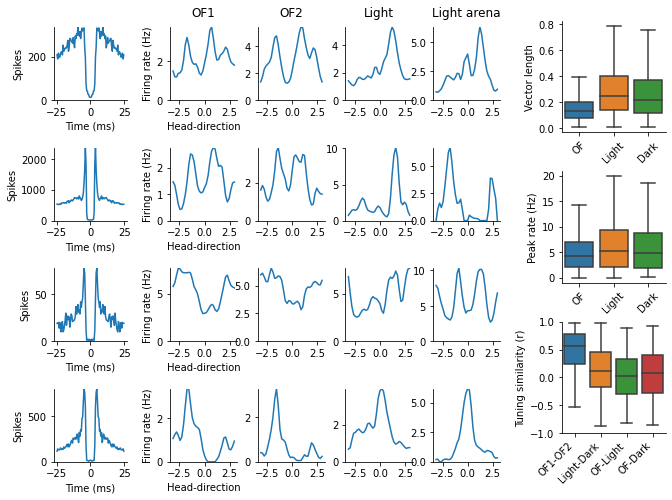

In [62]:

#plt.style.use("seaborn")

# to display names that are ok for the reader
condNames={"circ80_1":"OF1",
          "circ80_2": "OF2",
          "light": "Light",
          "dark": "Dark",
          "light_arena":"Light arena"}

col=5
row=4
sizePerCol=1.7
sizePerRow=2.0

fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=False) # create the overall figure to put all the axes on



#spike-time autocorrelations
gsAuto = fig.add_gridspec(nrows=row, ncols=1,left=0.0,right=0.12,
                        wspace=0.0,hspace=0.65)
for i,cellIndex in enumerate(selected_cells):
    ax = fig.add_subplot(gsAuto[i,0])
    ax.plot(autoTimestamps*1000,autoStack[cellIndex])
    ax.set_ylim(0,np.max(autoStack[cellIndex]))
    ax.set_ylabel("Spikes")
    ax.set_xlabel("Time (ms)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# hd histograms
gsMap = fig.add_gridspec(nrows=row, ncols=4,
                         wspace=0.3,hspace=0.65,
                        left=0.19,right=0.73)
angles = np.linspace(-np.pi,np.pi,37)
for i,cellIndex in enumerate(selected_cells):
    for j,cond in enumerate(["circ80_1","circ80_2", "light", "light_arena"]):
        ax = fig.add_subplot(gsMap[i,j])
        ax.plot(angles[:-1],myHist[cond][cellIndex])
        if (j==0):
            ax.set_ylabel("Firing rate (Hz)")
            ax.set_xlabel("Head-direction")
        ax.set_ylim(0,np.max(myHist[cond][cellIndex]))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if i == 0 :
            ax.set_title(condNames[cond],y=1.06)


##################
# statistics
##################
gsStats = fig.add_gridspec(nrows=3, ncols=1,
                           top=0.89,bottom=0.175,
                           hspace=0.35,wspace=0.1,
                           left=0.83,right=1)
ax = fig.add_subplot(gsStats[0,0])

df = hdStats[hdStats.condition.isin(["circ80","dark_arena","light_arena"])]
ax = sns.boxplot(x="condition", y="vectorLength", data=df,showfliers = False)
ax.set_xlabel("")
ax.set_ylabel("Vector length")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(["OF","Light","Dark"], rotation=45)


gsStats = fig.add_gridspec(nrows=3, ncols=1,
                           top=0.89,bottom=0.175,
                           hspace=0.35,wspace=0.1,
                           left=0.83,right=1)
ax = fig.add_subplot(gsStats[1,0])

df = hdStats[hdStats.condition.isin(["circ80","dark_arena","light_arena"])]
ax = sns.boxplot(x="condition", y="peakRate", data=df,showfliers = False)
ax.set_xlabel("")
ax.set_ylabel("Peak rate (Hz)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(["OF","Light","Dark"], rotation=45)



#######################################
# percentage of significant HD cells  #
#######################################




#####################
# Map similarity
#
ax = fig.add_subplot(gsStats[2,0])

df = hdStab
ax = sns.boxplot(x="condition", y="r", data=df,showfliers = False)
ax.set_ylim(-1,1)
ax.set_xlabel("")
ax.set_ylabel("Tuning similarity (r)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(["OF1-OF2","Light-Dark","OF-Light","OF-Dark"], rotation=45,horizontalalignment='right')
#ax.yaxis.set_label_coords(-0.4, 0.5)

fn=myProject.dataPath+"/results/hd_fig01.svg"
print("saving to",fn)
plt.savefig(fn)
plt.show()

Figure x. (**a**) Example of hippocampal neurons recorded during random foraging in an open field and during the path integration task. Left: spike-time autocorrelation. Right: Firing rate maps during open field foraging (OF) and during light (Light) and dark (Dark) trials of the AutoPI task. (**b** and **c**) Mean firing rates and spatial information scores of neurons during open field foraging and light and dark trails of the AutoPI task. (**d**) Firing rate map similarity between different conditions. OF1-OF2: first and second half of open field foraging; OF-Light: open field foraging and light trials; OF-Dark: open field foraging and dark trials; Light-Dark: light and dark trials.

saving to /adata/projects/autopi_ca1/results/directionalMapStab.svg


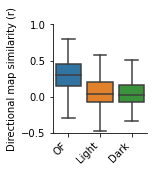

In [89]:
fig = plt.figure(figsize=(1.7,2))
gsStats = fig.add_gridspec(nrows=1, ncols=1,
                           hspace=0.35,wspace=0.1)                         
ax = fig.add_subplot(gsStats[0,0])

ax = sns.boxplot(x = "condition", y = "r", data = dirMapStab, showfliers=False)
ax.set_ylim(-0.5,1)
ax.set_xlabel("")
ax.set_ylabel("Directional map similarity (r)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(["OF","Light","Dark"], rotation=45,horizontalalignment='right')


fn=myProject.dataPath+"/results/directionalMapStab.svg"
print("saving to",fn)
plt.savefig(fn)

In [61]:
hdStats["signi"]=hdStats.vectorLength > 0.25

In [62]:
for cond in hdStats.condition.unique():
    print(cond,hdStats[hdStats.condition==cond].shape[0],np.sum(hdStats[hdStats.condition==cond]["signi"]))

np.sum(hdStats.signi),np.sum(~hdStats.signi)


circ80 472 83
circ80_1 472 103
circ80_2 472 107
light 472 180
light_arena 472 229
dark 472 159
dark_arena 472 199


(1060, 2244)

(array([21., 19., 33., 15., 18., 20., 19., 30., 13., 11.]),
 array([-3.05432619, -2.46091425, -1.8675023 , -1.27409035, -0.68067841,
        -0.08726646,  0.50614548,  1.09955743,  1.69296937,  2.28638132,
         2.87979327]),
 <BarContainer object of 10 artists>)

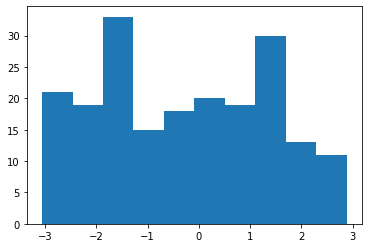

In [63]:
a = hdStats[hdStats.condition=="dark_arena"]
plt.hist(a[a.signi==True].peakAngle)

(0.0, 4.154124266735099)

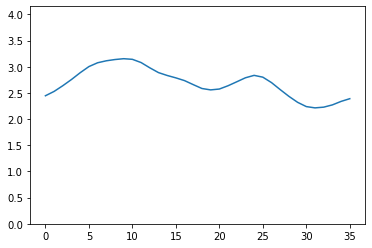

In [64]:
plt.plot(np.nanmean(myHist["dark_arena"][a.signi==True],axis=0))
plt.ylim(0,np.max(np.nanmean(myHist["dark_arena"][a.signi==True],axis=0)+1))

In [65]:
print(hdStats[hdStats.condition=="dark"])
print(hdStats[hdStats.condition=="dark_arena"])

                        cellId condition   prefDir  peakAngle   peakRate  \
7447   mn5824-20112020-0107_92      dark  2.614734   1.832596  11.647764   
7450  mn5824-20112020-0107_100      dark  2.728732  -2.530727   3.655211   
7452  mn5824-20112020-0107_114      dark -1.535658  -2.530727   4.399004   
7453  mn5824-20112020-0107_116      dark  0.728247   0.785398   2.778740   
7454  mn5824-20112020-0107_118      dark  3.111871   3.054326   1.674351   
...                        ...       ...       ...        ...        ...   
8909   mn9686-01112021-0106_79      dark  2.179949   2.181662   3.043100   
8910   mn9686-01112021-0106_81      dark -1.326021  -2.705260   0.934865   
8921  mn9686-01112021-0106_197      dark -0.501868  -0.261799   4.199424   
8932  mn9686-01112021-0106_242      dark  2.424057   1.134464  14.687475   
8933  mn9686-01112021-0106_246      dark -2.075376  -2.356194   9.539171   

      vectorLength  signi  
7447      0.105300  False  
7450      0.233030  False  
745

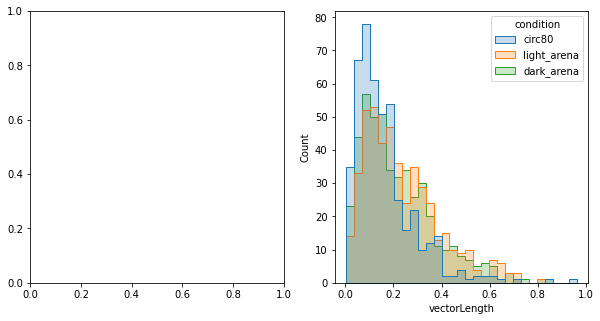

In [147]:
df = hdStats[hdStats.condition.isin(["circ80","dark_arena","light_arena"])]
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0] = sns.histplot(x="vectorLength", hue="condition",data=df, element="step", common_norm=False)
